inverse construction
NUMBER: 3

   pts[5].x: 3
  pts[13].x: 1/3

   pts[6].x: 3/5
   pts[6].y: 4/5

points:  16
           0            0
           1            0
          -1            0
           0            1
           0           -1
           3            0
         3/5          4/5
    -1 + 4*sqrt(5)/5            0
    -4*sqrt(5)/5 - 1            0
         3/5         -4/5
           0     -sqrt(55)/5
           0     sqrt(55)/5
        -9/5          8/5
         1/3            0
        -1/5          8/5
         3/5            0

elements:  7
    Line2D(Point2D(0, 0), Point2D(1, 0)) [] 
    Circle(Point2D(0, 0), 1) [] 
    Line2D(Point2D(0, 0), Point2D(0, 1)) [] 
    Line2D(Point2D(0, 1), Point2D(3, 0)) [] 
    Circle(Point2D(-1, 0), 4*sqrt(5)/5) ['green'] 
    Line2D(Point2D(0, 1), Point2D(3/5, -4/5)) [] 
    Line2D(Point2D(3/5, 4/5), Point2D(3/5, -4/5)) [] 


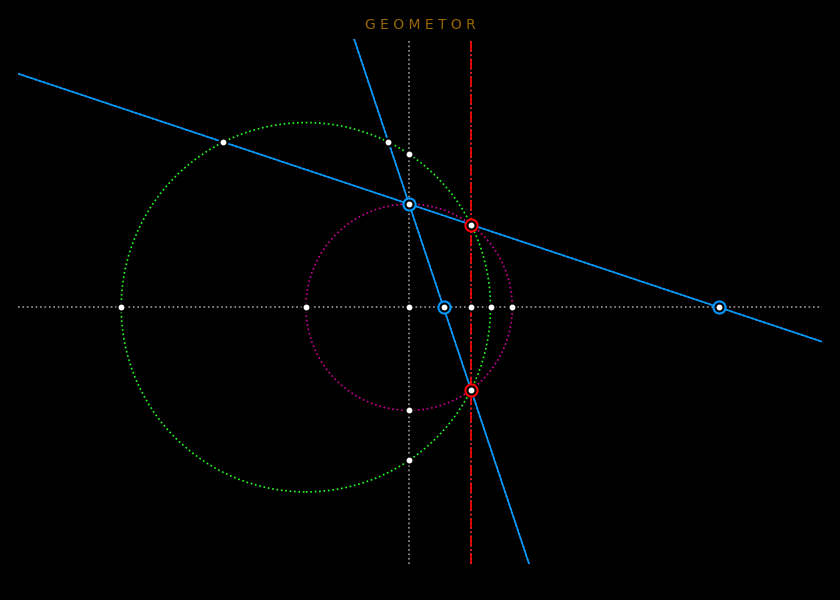

In [1]:
%run run.py
%matplotlib widget

# the number to invert
n = sp.Rational(3,1)

center = point(0, 0)
add_point(center)
A = point(1, 0)
add_point(A)

baseline = line(center, A)
add_element(baseline)

unitcircle = circle(center, A)
add_element(unitcircle)

B = point(0,1)
add_point(B)

#add baseline
add_element(line(center, B))

N = point(n, 0)
add_point(N)

L1 = line(B, N)
add_element(L1)

add_element(circle(pts[2], pts[6], classes=['green']))

L2 = line(B, pts[9])
add_element(L2)

chord = line(pts[6], pts[9])
add_element(chord)

limx = [0, 0]
limy = [0, 0]

for pt in pts:
    
    ptx = float(pt.x.evalf())
    pty = float(pt.y.evalf())
    # print(x, y)
    limx[0] = ptx if limx[0] > ptx else limx[0]
    limx[1] = ptx if limx[1] < ptx else limx[1]
    limy[0] = pty if limy[0] > pty else limy[0]
    limy[1] = pty if limy[1] < pty else limy[1]
    
limx[0] -= 1
limx[1] += 1
limy[0] -= 1
limy[1] += 1

bounds = set_bounds(limx, limy)

plt_init(limx, limy)

plot_elements(elements, bounds)
plot_line(L1, bounds, color='#09F', linestyle='-')
plot_line(L2, bounds, color='#09F', linestyle='-')
plot_line(chord, bounds, color='r', linestyle='-.')

plot_points([B, N, pts[13]], under_color='#09F', under_markersize=15, add_to_cursors=False)
plot_points([pts[6], pts[9]], under_color='r', under_markersize=15, add_to_cursors=False)
plot_points(pts)

print(f'inverse construction')
print(f'NUMBER: {n}')
print()
print(f'   pts[5].x: {pts[5].x}')
print(f'  pts[13].x: {pts[13].x}')
print()
print(f'   pts[6].x: {pts[6].x}')
print(f'   pts[6].y: {pts[6].y}')

print(f'\npoints: ', len(pts))
for pt in pts:
    print(f'    {str(pt.x): >8}     {str(pt.y): >8}')
print(f'\nelements: ', len(elements))
for el in elements:
    print(f'    {el} {el.classes} ')
    